<a href="https://colab.research.google.com/github/blanca-32/Biocomputacional/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descargado: examen_1/WT.fasta
Descargado: examen_1/Alpha.fasta
Descargado: examen_1/Beta.fasta
    Cepa  Longitud_nt  Longitud_aa
0     WT         1416          471
1  Alpha         1416           33
2   Beta         1359          452


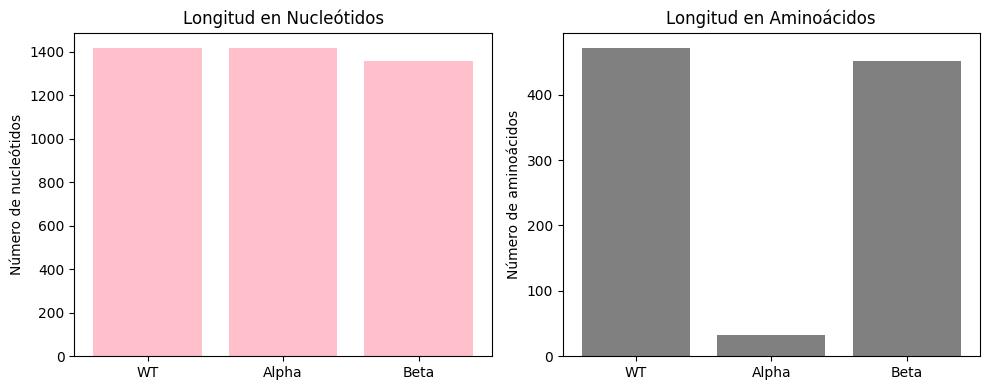


>>> Secuencia traducida de WT:
VKQSTIALALLPLLFTPVTKARTPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLIGDGMGDSEITAARNYAEGAGGFFKGIDALPLTGQYTHYALNKKTGKPDYVTDSAASATAWSTGVKTYNGALGVDIHEKDHPTILEMAKAAGLATGNVSTAELQDATPAALVAHVTSRKCYGPSATSEKCPGNALEKGGKGSITEQLLNARADVTLGGGAKTFAETATAGEWQGKTLREQAQARGYQLVSDAASLNSVTEANQQKPLLGLFADGNMPVRWLGPKATYHGNIDKPAVTCTPNPQRNDSVPTLAQMTDKAIELLSKNEKGFFLQVEGASIDKQDHAANPCGQIGETVDLDEAVQRALEFAKKEGNTLVIVTADHAHASQIVAPDTKAPGLTQALNTKDGAVMVMSYGNSEEDSQEHTGSQLRIAAYGPHAANVVGLTDQTDLFYTMKAALGLK*

>>> Secuencia traducida de Alpha:
VKQSTIALALLPLLFTPVTKARTPEMPVLENRA*QGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLIGDGMGDSEITAARNYAEGAGGFFKGIDALPLTGQYTHYALNKKTGKPDYVTDSAASATAWSTGVKTYNGALGVDIHEKDHPTILEMAKAAGLATGNVSTAELQDATPAALVAHVTSRKCYGPSATSEKCPGNALEKGGKGSITEQLLNARADVTLGGGAKTFAETATAGEWQGKTLREQAQARGYQLVSDAASLNSVTEANQQKPLLGLFADGNMPVRWLGPKATYHGNIDKPAVTCTPNPQRNDSVPTLAQMTDKAIELLSKNEKGFFLQVEGASIDKQDHAANPCGQIGETVDLDEAVQRALEFAKKEGNTLVIVTADHAHASQIVAPDTKAPGLTQALNTKDGAVMVMSYGNSEEDSQEHTGSQLRIAAYGPHAANVVGLTDQTDL

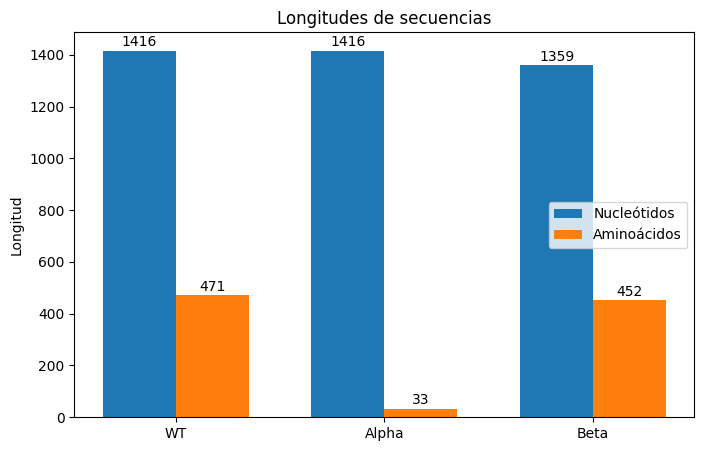

>>> WT vs Alpha
VKQSTIALALLPLLFTPVTKARTPEMPVLENRAA-QGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLIGDGMGDSEITAARNYAEGAGGFFKGIDALPLTGQYTHYALNKKTGKPDYVTDSAASATAWSTGVKTYNGALGVDIHEKDHPTILEMAKAAGLATGNVSTAELQDATPAALVAHVTSRKCYGPSATSEKCPGNALEKGGKGSITEQLLNARADVTLGGGAKTFAETATAGEWQGKTLREQAQARGYQLVSDAASLNSVTEANQQKPLLGLFADGNMPVRWLGPKATYHGNIDKPAVTCTPNPQRNDSVPTLAQMTDKAIELLSKNEKGFFLQVEGASIDKQDHAANPCGQIGETVDLDEAVQRALEFAKKEGNTLVIVTADHAHASQIVAPDTKAPGLTQALNTKDGAVMVMSYGNSEEDSQEHTGSQLRIAAYGPHAANVVGLTDQTDLFYTMKAALGLK*
|||||||||||||||||||||||||||||||| | ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
VKQSTIALALLPLLFTPVTKARTPEMPVLENR-A*Q

/usr/local/lib/python3.12/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [29]:
# Examen 1 - Blanca Sofia Del mar Cerinza perez
# Fundamentos de biologia computacional.

#Primer punto: Crear carpeta y descargar secuencias, en mi caso la llame "examen_1"

import os, urllib.request

carpeta = "examen_1"
os.makedirs(carpeta, exist_ok=True)

urls = {
    "WT.fasta": "https://raw.githubusercontent.com/lauraalazar/Online_BioComp/master/Ecoli_phoA.fasta",
    "Alpha.fasta": "https://raw.githubusercontent.com/lauraalazar/BiologiaComputacional/main/Ecoli_phoA_mutalpha.fasta",
    "Beta.fasta": "https://raw.githubusercontent.com/lauraalazar/BiologiaComputacional/main/Ecoli_phoA_mutbeta.fasta"
}

for nombre, url in urls.items():
    destino = os.path.join(carpeta, nombre)
    urllib.request.urlretrieve(url, destino)
    print(f"Descargado: {destino}")

#Segundo punto: Importar Biopython y cargar secuencias FASTA, profe gracias por la opcion en colab, desde la terminal es como más miedoso.

!pip install biopython

from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

secuencias = {
    "WT": SeqIO.read(f"{carpeta}/WT.fasta", "fasta"),
    "Alpha": SeqIO.read(f"{carpeta}/Alpha.fasta", "fasta"),
    "Beta": SeqIO.read(f"{carpeta}/Beta.fasta", "fasta")
}

#Tercer punto: Comparar longitud de las secuencias de nucleótidos y aminoácidos, creando un DataFrame con, cepa, longitud_nt (longitud en nucleótidos), Longitud_aa (longitud en aminoácidos, secuencia traducida)

data = []
for cepa, record in secuencias.items():
    longitud_nt = len(record.seq)
    longitud_aa = len(record.seq.translate(to_stop=True))
    data.append({
        "Cepa": cepa,
        "Longitud_nt": longitud_nt,
        "Longitud_aa": longitud_aa
    })

df = pd.DataFrame(data)
print(df)

#Cuarto punto. Gráfico para cada tipo de longitud.
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico para nucleótidos, por cepa
axs[0].bar(df["Cepa"], df["Longitud_nt"], color="pink")
axs[0].set_title("Longitud en Nucleótidos")
axs[0].set_ylabel("Número de nucleótidos")

# Gráfico para aminoácidos, por cepa
axs[1].bar(df["Cepa"], df["Longitud_aa"], color="grey")
axs[1].set_title("Longitud en Aminoácidos")
axs[1].set_ylabel("Número de aminoácidos")

plt.tight_layout()
plt.show()

# Quinto punto. Imprima las secuencias de aminoácidos y los codones de parada

for cepa, record in secuencias.items():
    proteina = record.seq.translate()
    print(f"\n>>> Secuencia traducida de {cepa}:")
    print(proteina)



import matplotlib.pyplot as plt
x = range(len(df))  # posiciones en el eje X
width = 0.35        # ancho de las barras

fig, ax = plt.subplots(figsize=(8,5))

# Barras de nucleótidos
ax.bar([p - width/2 for p in x], df["Longitud_nt"], width, label="Nucleótidos")

# Barras de aminoácidos
ax.bar([p + width/2 for p in x], df["Longitud_aa"], width, label="Aminoácidos")

ax.set_xticks(x)
ax.set_xticklabels(df["Cepa"])
ax.set_ylabel("Longitud")
ax.set_title("Longitudes de secuencias")
ax.legend()
for p, value in zip([p - width/2 for p in x], df["Longitud_nt"]):
    ax.text(p, value + 5, str(value), ha='center', va='bottom')

for p, value in zip([p + width/2 for p in x], df["Longitud_aa"]):
    ax.text(p, value + 5, str(value), ha='center', va='bottom')
plt.show()

#codigo para comparar las mutaciones optenidas del quinto punto.
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Secuencias traducidas
wt = "VKQSTIALALLPLLFTPVTKARTPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLIGDGMGDSEITAARNYAEGAGGFFKGIDALPLTGQYTHYALNKKTGKPDYVTDSAASATAWSTGVKTYNGALGVDIHEKDHPTILEMAKAAGLATGNVSTAELQDATPAALVAHVTSRKCYGPSATSEKCPGNALEKGGKGSITEQLLNARADVTLGGGAKTFAETATAGEWQGKTLREQAQARGYQLVSDAASLNSVTEANQQKPLLGLFADGNMPVRWLGPKATYHGNIDKPAVTCTPNPQRNDSVPTLAQMTDKAIELLSKNEKGFFLQVEGASIDKQDHAANPCGQIGETVDLDEAVQRALEFAKKEGNTLVIVTADHAHASQIVAPDTKAPGLTQALNTKDGAVMVMSYGNSEEDSQEHTGSQLRIAAYGPHAANVVGLTDQTDLFYTMKAALGLK*"
alpha = "VKQSTIALALLPLLFTPVTKARTPEMPVLENRA*QGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLIGDGMGDSEITAARNYAEGAGGFFKGIDALPLTGQYTHYALNKKTGKPDYVTDSAASATAWSTGVKTYNGALGVDIHEKDHPTILEMAKAAGLATGNVSTAELQDATPAALVAHVTSRKCYGPSATSEKCPGNALEKGGKGSITEQLLNARADVTLGGGAKTFAETATAGEWQGKTLREQAQARGYQLVSDAASLNSVTEANQQKPLLGLFADGNMPVRWLGPKATYHGNIDKPAVTCTPNPQRNDSVPTLAQMTDKAIELLSKNEKGFFLQVEGASIDKQDHAANPCGQIGETVDLDEAVQRALEFAKKEGNTLVIVTADHAHASQIVAPDTKAPGLTQALNTKDGAVMVMSYGNSEEDSQEHTGSQLRIAAYGPHAANVVGLTDQTDLFYTMKAALGLK*"
beta = "KARTPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLIGDGMGDSEITAARNYAEGAGGFFKGIDALPLTGQYTHYALNKKTGKPDYVTDSAASATAWSTGVKTYNGALGVDIHEKDHPTILEMAKAAGLATGNVSTAELQDATPAALVAHVTSRKCYGPSATSEKCPGNALEKGGKGSITEQLLNARADVTLGGGAKTFAETATAGEWQGKTLREQAQARGYQLVSDAASLNSVTEANQQKPLLGLFADGNMPVRWLGPKATYHGNIDKPAVTCTPNPQRNDSVPTLAQMTDKAIELLSKNEKGFFLQVEGASIDKQDHAANPCGQIGETVDLDEAVQRALEFAKKEGNTLVIVTADHAHASQIVAPDTKAPGLTQALNTKDGAVMVMSYGNSEEDSQEHTGSQLRIAAYGPHAANVVGLTDQTDLFYTMKAALGLK*"

# Comparación WT vs Alpha
print(">>> WT vs Alpha")
alignments = pairwise2.align.globalxx(wt, alpha)
print(format_alignment(*alignments[0]))

# Comparación WT vs Beta
print("\n>>> WT vs Beta")
alignments = pairwise2.align.globalxx(wt, beta)
print(format_alignment(*alignments[0]))

# Comparación Alpha vs Beta
print("\n>>> Alpha vs Beta")
alignments = pairwise2.align.globalxx(alpha, beta)
print(format_alignment(*alignments[0]))





Interpretacion sobre el efecto de la mutacion en las secuencias:

En la grafica vista para longuitud de nucleotidos vemos la relacion similar entre sus valores, entre 1350 a 1460 ppor ende en la grafica vemos un resultado verosimil, en cambio el valor de alpha en sus aminoacidos es mucho menor al resto, esto puede ser que gran parte de su genoma NO codifique para proteinas, a diferencia de la especie WT y beta.


En el caso de las mutaciones puntuales, estas generan cambios en la identidad de ciertos aminoácidos, lo que puede modificar la conformación tridimensional de la proteína y su función. Aun mas cuando la mutación introduce un codón de parada prematuro(`*`), provoca que la síntesis de proteínas cortada. Esta alteración afecta la estabilidad y actividad de la proteína, pudiendo traducirse en una pérdida parcial o total de función. siendo nuestros codon de parada GLK*

Analisando asi: con la comparacion de secuencias.

WT: es un especimen con sus codificacion a proteínas íntegral y funcional.

Alpha: una viariante con stop prematuro → proteína truncada, probablemente no funcional.

Beta: variante con deleción N-terminal → proteína incompleta en su inicio, faltandole "VKQSTIALALLPLLFTPVT" en su inicio, probablemente con función parcial o nula.

Ambos tipos de mutación truncamiento y deleción comprometen gravemente la función de la proteína respecto a la WT.

Profe coloque dos graficas como por redundante pero en verdad solo con la primera esta suficiente.